In [1]:
from music21 import *

# Lists

In [2]:
n1 = note.Note('C4')
n1.duration.type = 'half'
n2 = note.Note('F#4')
n3 = note.Note('B-2')
noteList = [n1, n2, n3]
print(noteList)

[<music21.note.Note C>, <music21.note.Note F#>, <music21.note.Note B->]


# Streams

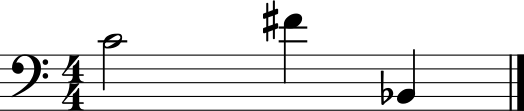

In [3]:
stream1 = stream.Stream()
stream1.append(n1)
stream1.append(n2)
stream1.append(n3)
stream1.show()

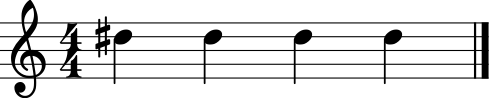

In [4]:
stream2 = stream.Stream()
note3 = note.Note('D#5')
stream2.repeatAppend(note3, 4)
stream2.show()

In [5]:
stream1.show('text')

{0.0} <music21.note.Note C>
{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


# Accessing Streams

In [6]:
for n in stream1:
    print(n.step)

C
F
B


In [7]:
stream1[0]

<music21.note.Note C>

In [8]:
n3Index = stream1.index(n3)
n3Index

2

In [9]:
stream1.pop(n3Index)

<music21.note.Note B->

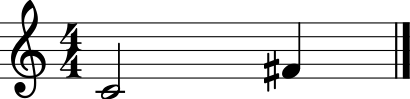

In [10]:
stream1.show()

In [11]:
stream1.append(n3)

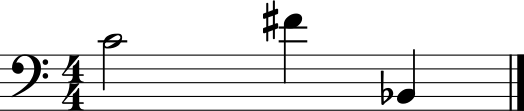

In [12]:
stream1.show()

In [13]:
stream1.show('midi')

# Separating out elements by class or offset

In [14]:
for n in stream1.getElementsByClass(note.Note):
    print(n, n.offset)

<music21.note.Note C> 0.0
<music21.note.Note F#> 2.0
<music21.note.Note B-> 3.0


In [15]:
for n in stream1.getElementsByClass('Note'):
    print(n, n.offset)

<music21.note.Note C> 0.0
<music21.note.Note F#> 2.0
<music21.note.Note B-> 3.0


In [16]:
for n in stream1.getElementsByClass(['Note', 'Rest']):
    print(n, n.offset)

<music21.note.Note C> 0.0
<music21.note.Note F#> 2.0
<music21.note.Note B-> 3.0


In [17]:
for n in stream1.notes:
    print(n, n.offset)

<music21.note.Note C> 0.0
<music21.note.Note F#> 2.0
<music21.note.Note B-> 3.0


In [18]:
for n in stream1.notesAndRests:
    print(n, n.offset)

<music21.note.Note C> 0.0
<music21.note.Note F#> 2.0
<music21.note.Note B-> 3.0


In [19]:
listOut = stream1.pitches
listOut

[<music21.pitch.Pitch C4>,
 <music21.pitch.Pitch F#4>,
 <music21.pitch.Pitch B-2>]

In [20]:
sOut = stream1.getElementsByClass(note.Note)
sOut.show('text')

{0.0} <music21.note.Note C>
{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


In [21]:
sOut = stream1.getElementsByClass(note.Note).stream() # <-- different
sOut.show('text')

{0.0} <music21.note.Note C>
{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


In [24]:
sOut = stream1.getElementsByOffset(3)
list(sOut)

[<music21.note.Note B->]

In [25]:
sOut = stream1.getElementsByOffset(2, 3).stream()
sOut.show('text')

{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


# More Stream Features

In [26]:
stream1.analyze('ambitus')

<music21.interval.Interval A12>

In [27]:
n1.offset

0.0

In [28]:
n2.offset

2.0

In [29]:
n3.offset

3.0

In [30]:
for n in stream1:
    print(n.offset, n.name)

0.0 C
2.0 F#
3.0 B-


In [31]:
n2.getOffsetBySite(stream1)

2.0

In [32]:
defaults.meterNumerator

4

In [33]:
defaults.meterDenominator

'quarter'

In [34]:
stream1.show('text')

{0.0} <music21.note.Note C>
{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


In [35]:
stream1.duration

<music21.duration.Duration 4.0>

In [36]:
stream1.duration.type

'whole'

In [38]:
stream1.lowestOffset

0.0

In [39]:
stream1.highestTime

4.0

# Streams within Streams

In [40]:
biggerStream = stream.Stream()
note2 = note.Note("D#5")
biggerStream.insert(0, note2)

In [41]:
biggerStream.append(stream1)

In [42]:
biggerStream.show('text')

{0.0} <music21.note.Note D#>
{1.0} <music21.stream.Stream 0x7f4f2c7c7198>
    {0.0} <music21.note.Note C>
    {2.0} <music21.note.Note F#>
    {3.0} <music21.note.Note B->


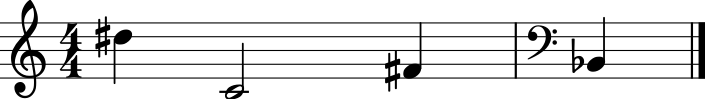

In [43]:
biggerStream.show()

In [44]:
biggerStream.show('midi')